In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\celin\OneDrive\Desktop\Career Foundry\Instacart Basket Analysis 5.23'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'merged_final.pkl'))

In [4]:
df.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


<Axes: >

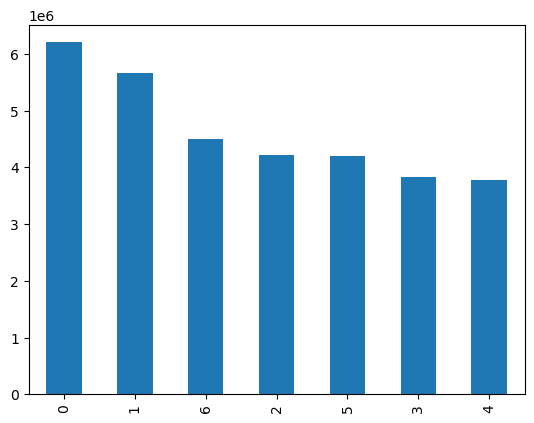

In [5]:
# create bar chart
df['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

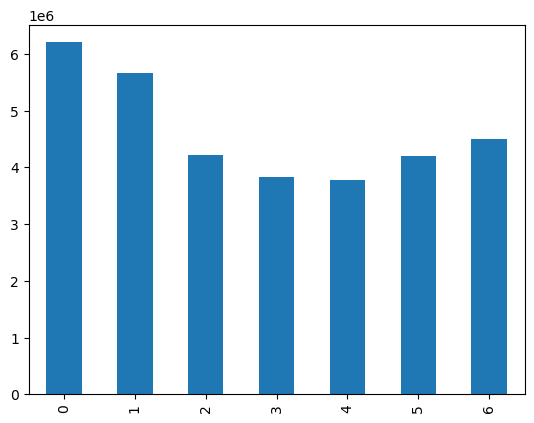

In [6]:
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

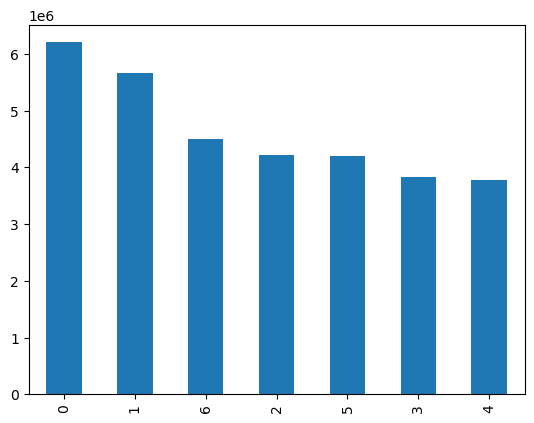

In [7]:
bar = df['orders_day_of_week'].value_counts().plot.bar()

In [8]:
# saving visuals
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

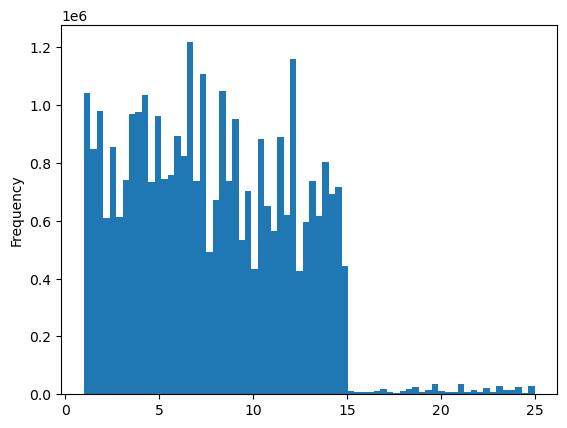

In [9]:
# create histogram
hist = df['prices'].plot.hist(bins = 70)

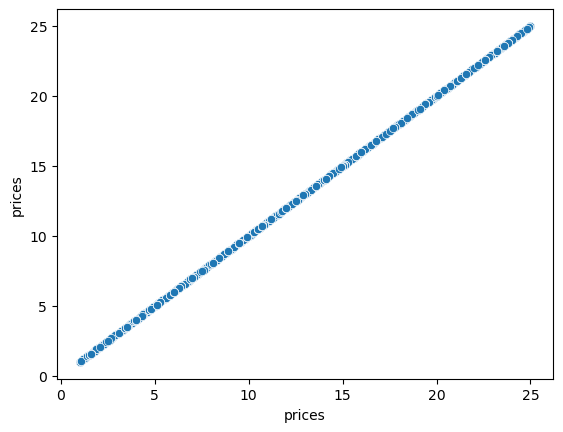

In [10]:
# Create scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [11]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Prices_hist_1.png'))

In [12]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

In [13]:
# Prices >100 were already taken care of in practice exercise
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,Number_of_dependants,fam_status,income,_merge


In [14]:
# Create list: np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [15]:
dev

array([False,  True,  True, ...,  True,  True,  True])

In [16]:
# check:
np.random.rand(10)

array([0.18895904, 0.39894326, 0.0854491 , 0.51051471, 0.57329414,
       0.47849235, 0.50158526, 0.64564265, 0.57830722, 0.98298566])

In [17]:
# Store 70% of samples in 'big' dataframe
big = df[dev]

In [18]:
# Store 30% of samples in 'small' dataframe
small = df[~dev]

In [19]:
len(df)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
# display only columns needed:
df_2 = small[['orders_day_of_week','prices']]

In [22]:
# check:
df_2.head()

,orders_day_of_week,prices
0,2,9.000000
3,4,9.000000
5,2,9.000000
6,1,9.000000
13,3,4.398438


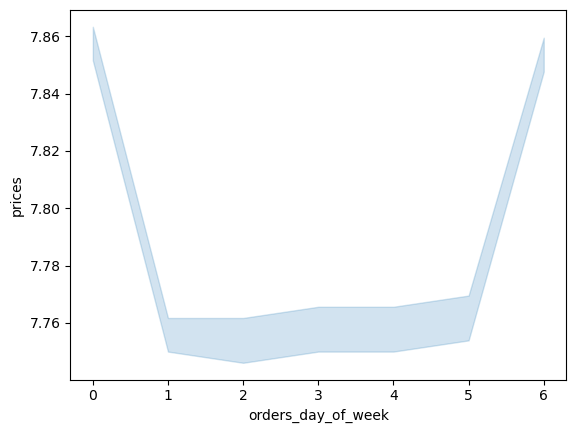

In [23]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [24]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_ordersdow.png'))

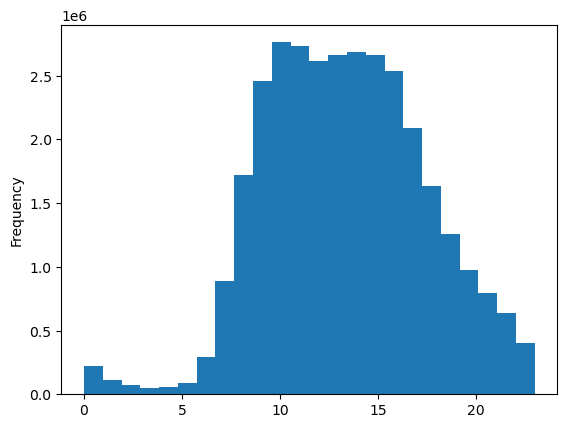

In [25]:
# Step 3 - Create a histogram of the “order_hour_of_day” column: Histogram shows what time of day orders are placed, we previously learned 10am is the busiest hour. 

hist1 = df['order_hour_of_day'].plot.hist(bins = 24)

In [26]:
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_hist1.png'))

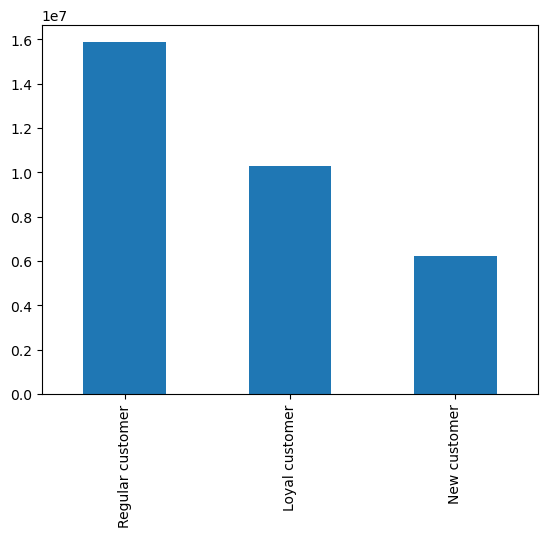

In [27]:
# Step 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

bar1 = df['loyalty_flag'].value_counts().plot.bar()

In [28]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))

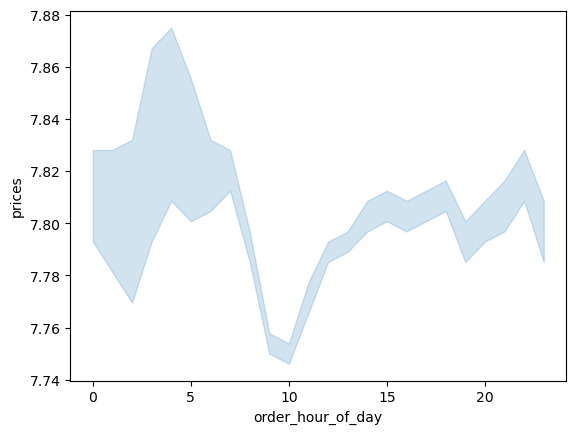

In [29]:
# Step 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. Trying without sample:

line1 = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

In [30]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_per_hour.png'))

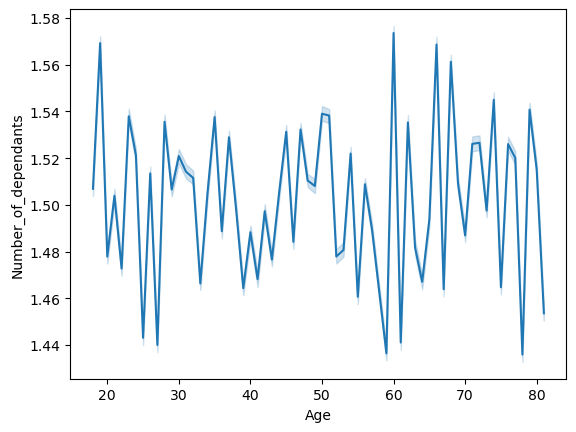

In [31]:
# Step 6 - Connections between age and number of dependents: No clear trend between age and # of dependants visible

line2 = sns.lineplot(data = df, x = 'Age', y = 'Number_of_dependants')

In [32]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_n_dep.png'))

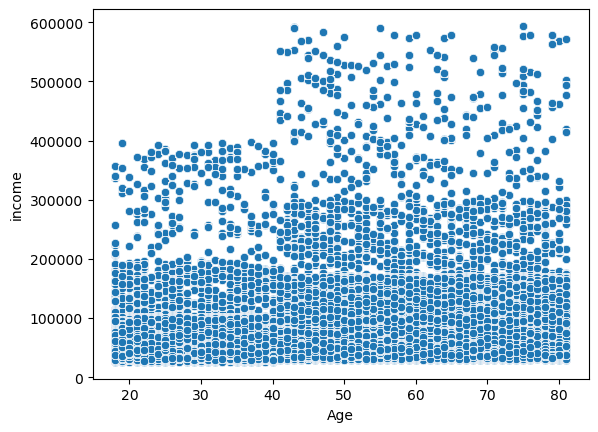

In [33]:
# Step 7 - Explore whether there’s a connection between age and spending power (income). 

scatter_spendingpower = sns.scatterplot(data = df, x = 'Age', y = 'income')

In [35]:
# Export:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_merged_vis.pkl'))